In [135]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

##Reading the "csv" files (Registration)

In [136]:
# reading the 2012toDec2014
df_1= pd.read_csv(r"E:/New folder/2012toDec2014.csv")
df_1.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [137]:
# reading the FromJan2015toDec2016
df_2= pd.read_csv(r"E:/New folder/2015toDec2016.csv")
df_2.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [138]:
# reading the Jan2017
df_3= pd.read_csv(r"E:/New folder/Jan2017.csv")
df_3.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


##Preprocessing

In [139]:
#df_1 does not have a "remaining_lease" column so, I choose the df_2 and df_3 only

#concadinating the df_2 and df_3

df_4= pd.concat([df_2,df_3],axis= 0)
df_4.reset_index(drop= True, inplace= True)
df_4.tail(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
228818,2024-10,YISHUN,5 ROOM,870,YISHUN ST 81,04 TO 06,122.0,Improved,1987,62 years 04 months,690000.0
228819,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,10 TO 12,164.0,Apartment,1992,66 years 09 months,1000000.0


In [140]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228820 entries, 0 to 228819
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                228820 non-null  object 
 1   town                 228820 non-null  object 
 2   flat_type            228820 non-null  object 
 3   block                228820 non-null  object 
 4   street_name          228820 non-null  object 
 5   storey_range         228820 non-null  object 
 6   floor_area_sqm       228820 non-null  float64
 7   flat_model           228820 non-null  object 
 8   lease_commence_date  228820 non-null  int64  
 9   remaining_lease      228820 non-null  object 
 10  resale_price         228820 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 19.2+ MB


In [141]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

##### Encoding the catogarical columns and
chaning the datatype

In [142]:
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [143]:
# Creating a new column "address"
df_4["address"]= df_4["block"]+" "+df_4["street_name"]
#droping the "street_name" and "block"
df_5= df_4.drop(columns=["block","street_name"])
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [144]:
# for month
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")

#spliting the month column to "Year", "month", "day"
df_5["year"]= df_5["month"].dt.year
df_5["month"]= df_5["month"].dt.month
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [145]:
df_5["town"].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [146]:
df_5["town"].nunique()

26

In [147]:
df_5["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [148]:
df_5["flat_model"].unique()


array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [149]:
df_5["flat_model"].nunique()

21

In [150]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"]= LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"]= OrdinalEncoder().fit_transform(df_5[["flat_model"]])
df_5["flat_type"]= OrdinalEncoder().fit_transform(df_5[["flat_type"]])

In [151]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [152]:
df_5["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [153]:
df_5["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [154]:
df_5.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
228818,10,25,4.0,04 TO 06,122.0,5.0,1987,62 years 04 months,690000.0,870 YISHUN ST 81,2024
228819,10,25,5.0,10 TO 12,164.0,3.0,1992,66 years 09 months,1000000.0,654 YISHUN AVE 4,2024


In [155]:
df_5[["storey_start", "storey_end"]]= df_5["storey_range"].str.split(" TO ",expand=True)

In [156]:
#droping the "storey_range" column
df_5.drop(columns=["storey_range"],inplace= True)
df_5.head(2)


,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [157]:
df_5["address"].nunique()

9611

In [158]:
# Address have 9559 unique values in the 207823 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df_5["address"]= LabelEncoder().fit_transform(df_5["address"])
df_5["storey_start"]= df_5["storey_start"].astype(int)
df_5["storey_end"]= df_5["storey_end"].astype(int)


In [159]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [160]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [161]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [162]:
#droping the "remaining_lease" column
df_5.drop(columns=["remaining_lease"],inplace= True)

In [163]:
df_6= pd.concat([df_5,df_data],axis=1)

In [164]:
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [165]:
# set the columns
df_7= df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [166]:
df_8=df_7.sort_values(by=["year","month"])

In [167]:
df_8.to_csv("ResaleFlatPrices.csv", index= False)

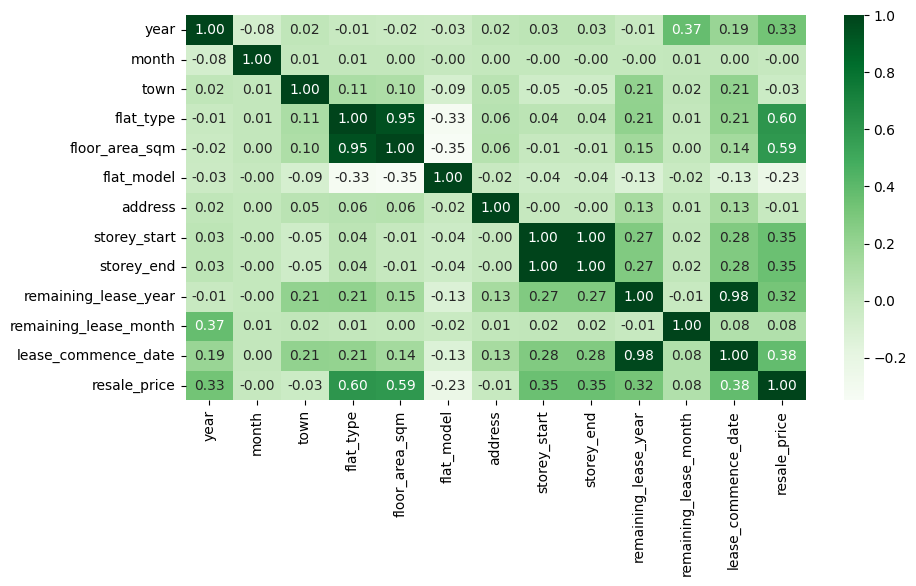

In [168]:
# Checking the Correlation using heatmap

df_8_corr= df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [169]:
df_final= pd.read_csv(r"E:/New folder/Jan2017.csv")
df_final.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [170]:
# checking the duplicate values
df_final.duplicated().sum()

np.int64(292)

In [171]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)
df_final_1.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
191373,2024-10,YISHUN,5 ROOM,870,YISHUN ST 81,04 TO 06,122.0,Improved,1987,62 years 04 months,690000.0
191374,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,10 TO 12,164.0,Apartment,1992,66 years 09 months,1000000.0


In [172]:
df_final_2= df_final_1.drop(columns=["month","street_name"])

In [173]:
df_final_2.tail(2)

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
191373,YISHUN,5 ROOM,870,04 TO 06,122.0,Improved,1987,62 years 04 months,690000.0
191374,YISHUN,EXECUTIVE,654,10 TO 12,164.0,Apartment,1992,66 years 09 months,1000000.0


In [174]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.displot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

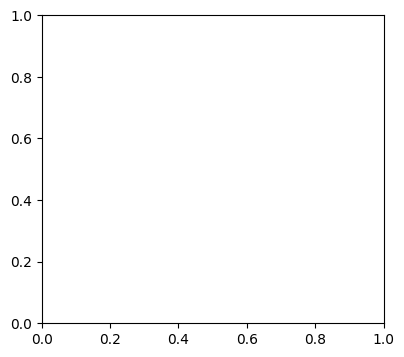

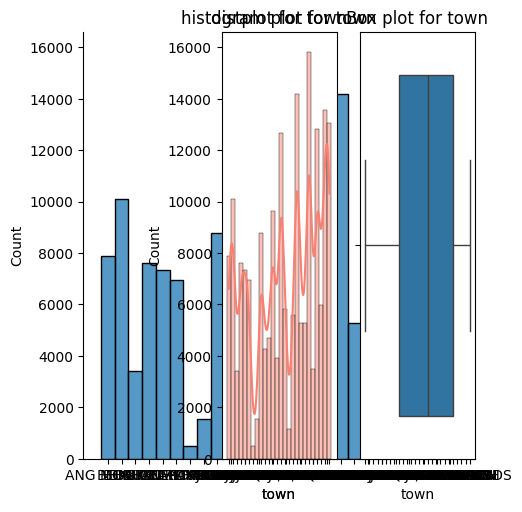

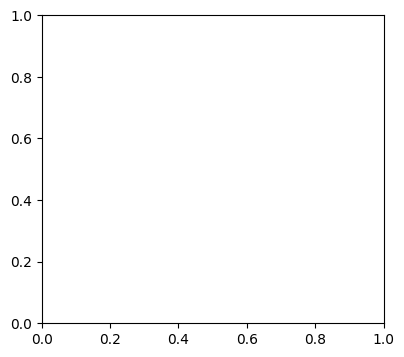

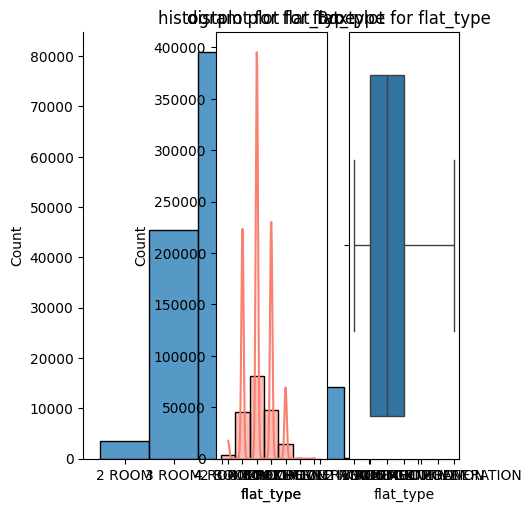

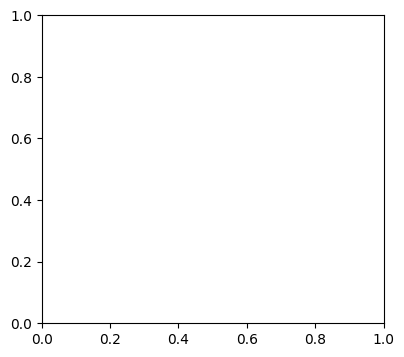

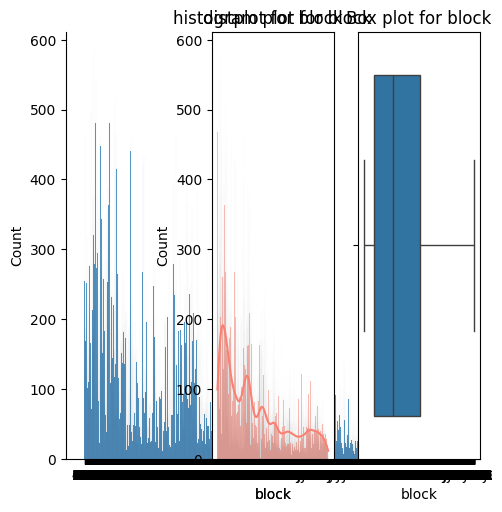

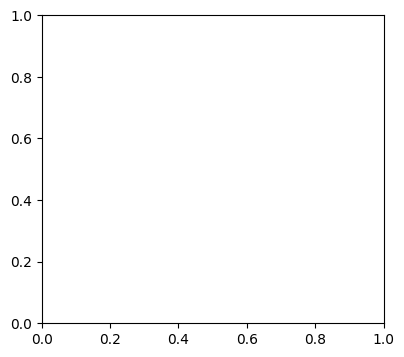

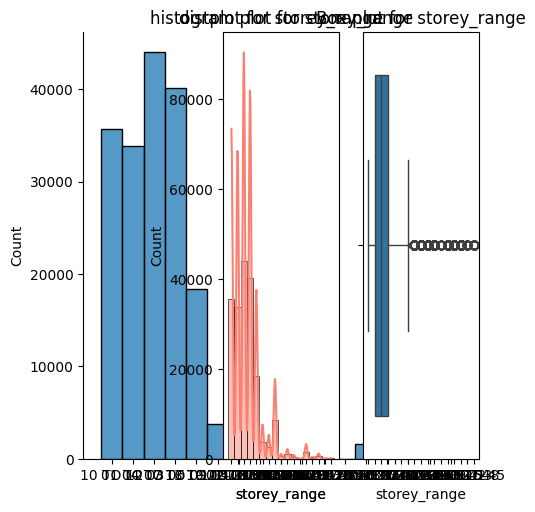

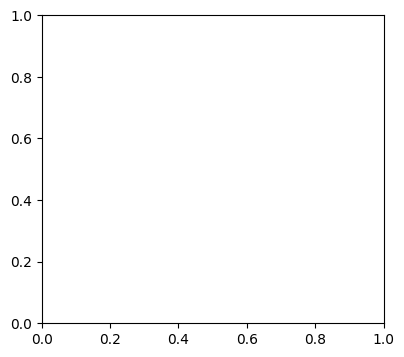

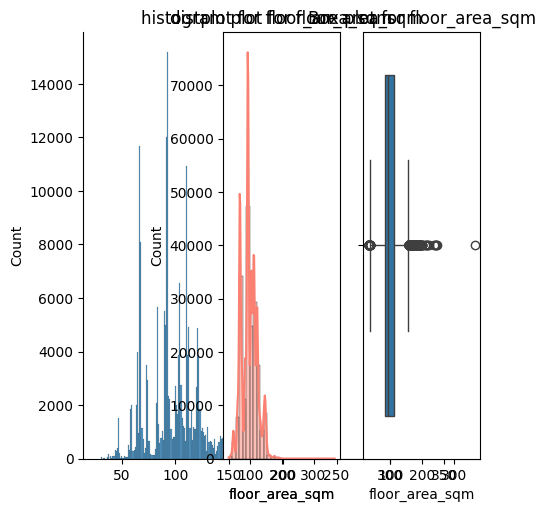

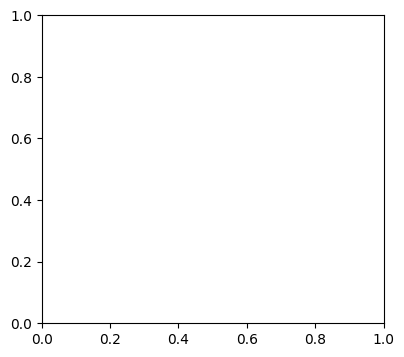

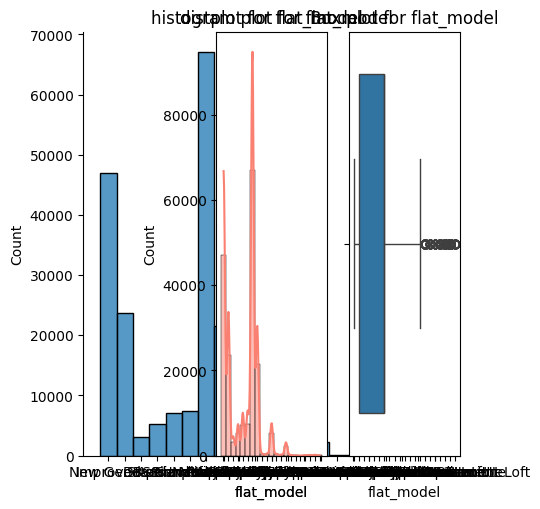

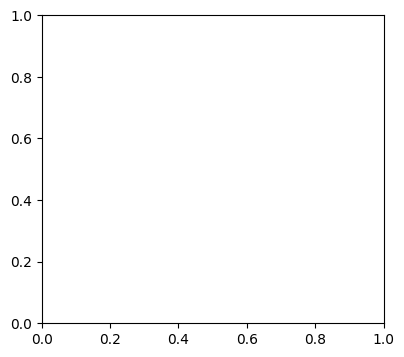

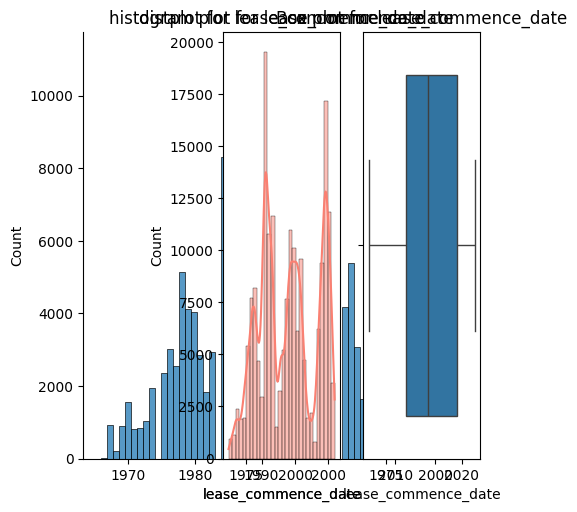

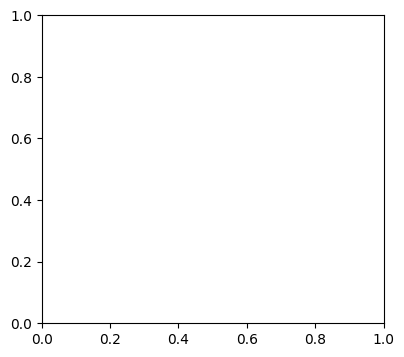

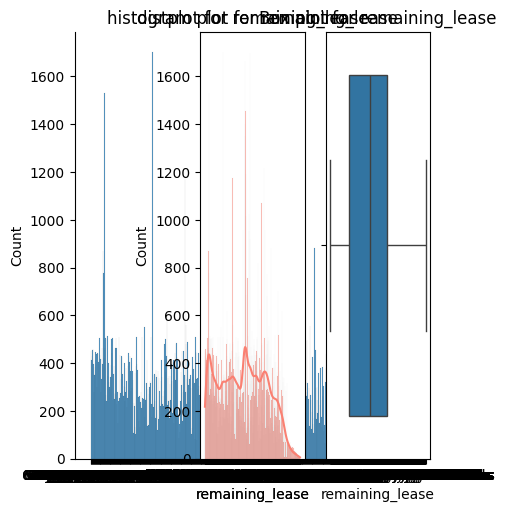

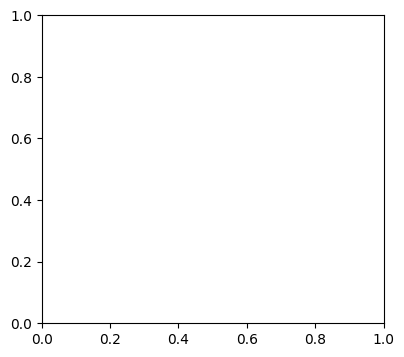

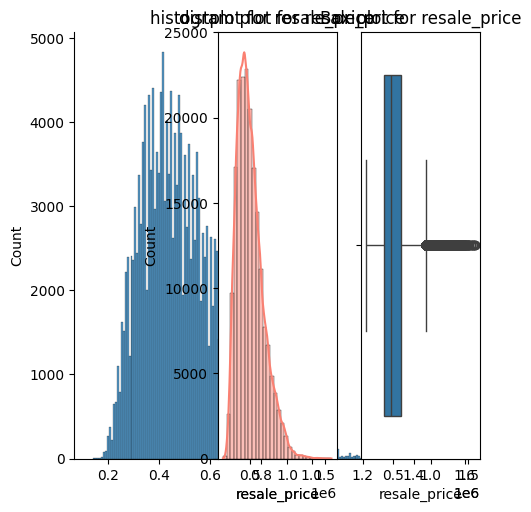

In [175]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [176]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,191375.0,97.056775,24.044988,31.0,82.0,93.0,112.0,366.7
lease_commence_date,191375.0,1996.129609,14.110673,1966.0,1985.0,1996.0,2011.0,2020.0
resale_price,191375.0,504667.067995,176106.219668,140000.0,375000.0,475000.0,600000.0,1588000.0


In [177]:
df_final_3= df_final_2.copy()

In [178]:
df_final_3

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,406,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,ANG MO KIO,3 ROOM,108,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,ANG MO KIO,3 ROOM,602,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,ANG MO KIO,3 ROOM,465,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,ANG MO KIO,3 ROOM,601,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...
191370,YISHUN,5 ROOM,504C,10 TO 12,113.0,Improved,2016,90 years 06 months,747000.0
191371,YISHUN,5 ROOM,502D,04 TO 06,112.0,Improved,2018,92 years 04 months,725000.0
191372,YISHUN,5 ROOM,644,07 TO 09,123.0,Improved,1988,62 years 09 months,728000.0
191373,YISHUN,5 ROOM,870,04 TO 06,122.0,Improved,1987,62 years 04 months,690000.0


In [179]:
# The Skewness Columns are
# 2. floor_area_sqm
# 3. lease_commence_date
# 4. resale_price

In [180]:
df_final_3["storey_start"]= np.log(df_final_3["lease_commence_date"])
df_final_3["storey_end"]= np.log(df_final_3["floor_area_sqm"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

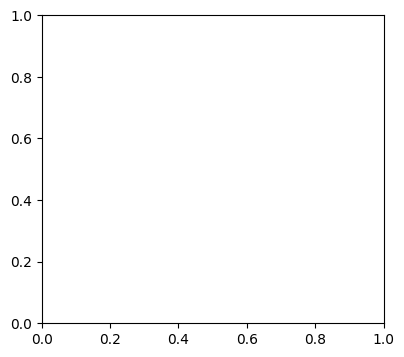

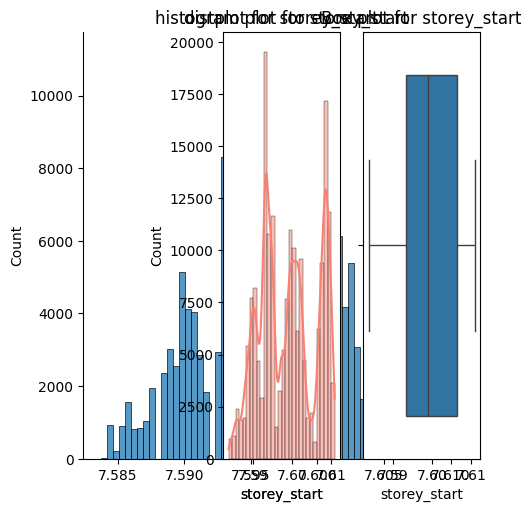

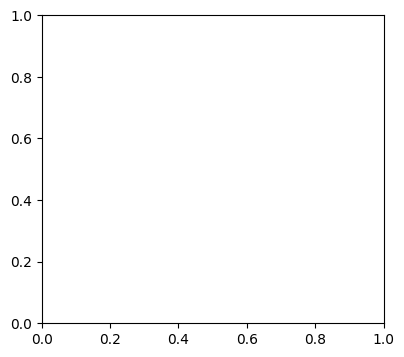

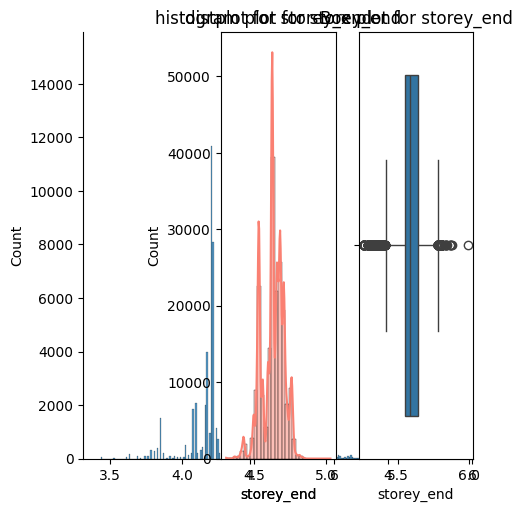

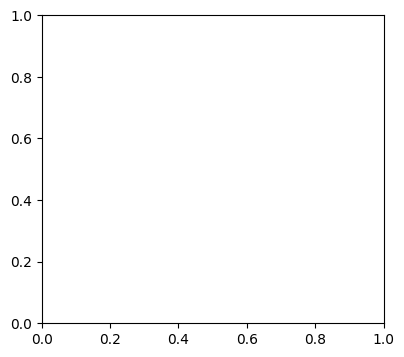

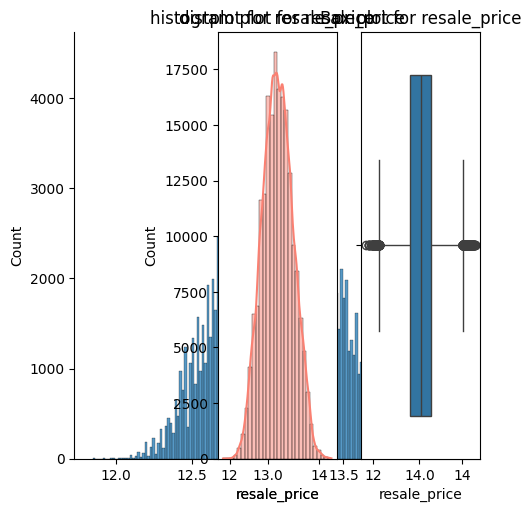

In [181]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
 plot(df_final_3,i)

##3#Outliers Handling - Interquartile Range(IQR) Method

In [182]:
df_final_4= df_final_3.copy()

In [183]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [184]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

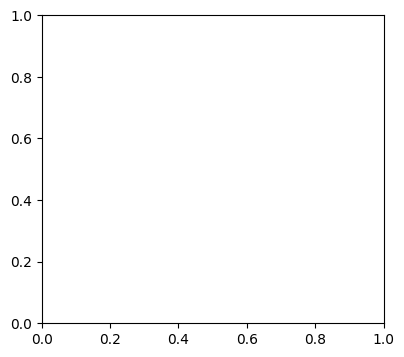

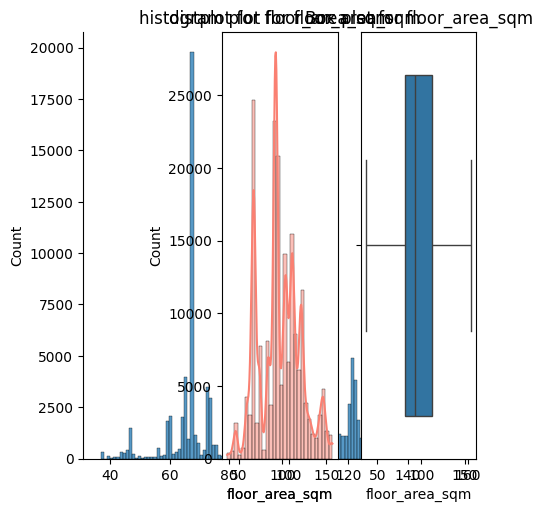

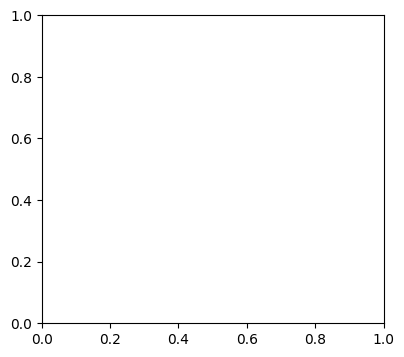

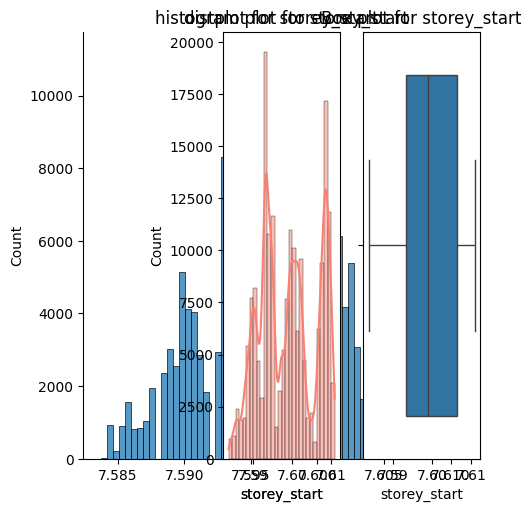

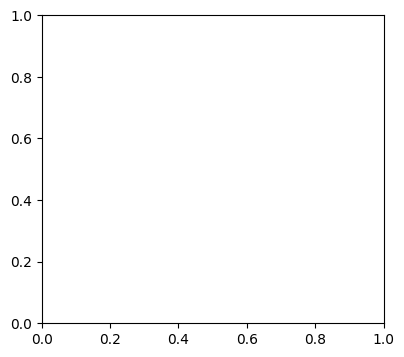

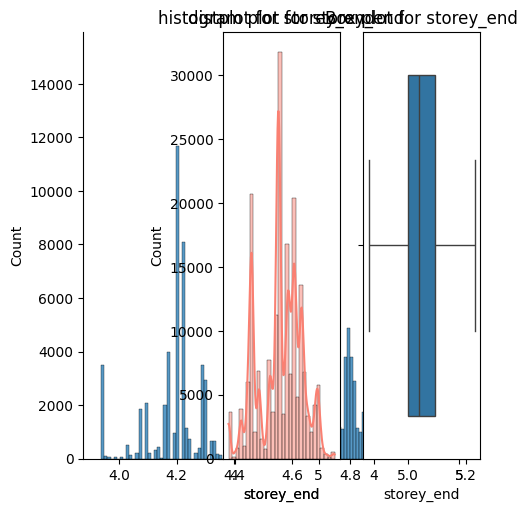

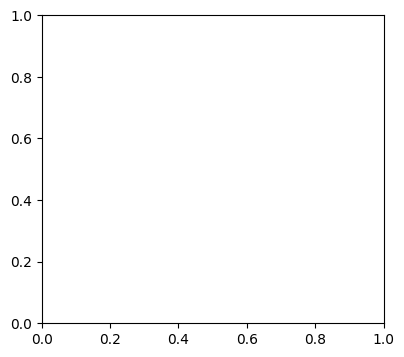

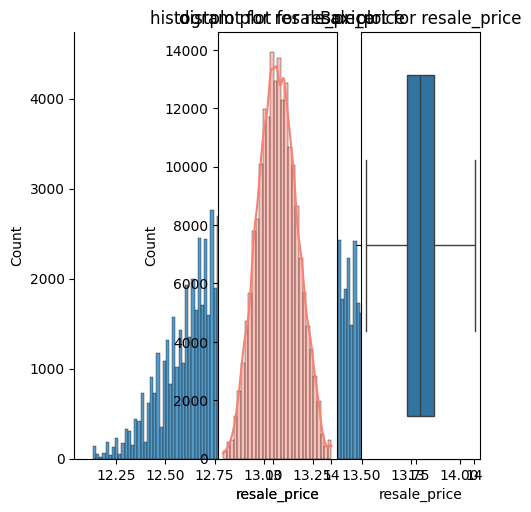

In [185]:
for k in outlier_columns:
    plot(df_final_4,k)

In [186]:
df_final_5= df_final_4.copy()

In [211]:
df_final_5

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey_start,storey_end
0,ANG MO KIO,2 ROOM,406,10 TO 12,44.0,Improved,1979,61 years 04 months,12.354493,7.590347,3.939050
1,ANG MO KIO,3 ROOM,108,01 TO 03,67.0,New Generation,1978,60 years 07 months,12.429216,7.589842,4.204693
2,ANG MO KIO,3 ROOM,602,01 TO 03,67.0,New Generation,1980,62 years 05 months,12.476100,7.590852,4.204693
3,ANG MO KIO,3 ROOM,465,04 TO 06,68.0,New Generation,1980,62 years 01 month,12.487485,7.590852,4.219508
4,ANG MO KIO,3 ROOM,601,01 TO 03,67.0,New Generation,1980,62 years 05 months,12.487485,7.590852,4.204693
...,...,...,...,...,...,...,...,...,...,...,...
191370,YISHUN,5 ROOM,504C,10 TO 12,113.0,Improved,2016,90 years 06 months,13.523820,7.608871,4.727388
191371,YISHUN,5 ROOM,502D,04 TO 06,112.0,Improved,2018,92 years 04 months,13.493927,7.609862,4.718499
191372,YISHUN,5 ROOM,644,07 TO 09,123.0,Improved,1988,62 years 09 months,13.498056,7.594884,4.812184
191373,YISHUN,5 ROOM,870,04 TO 06,122.0,Improved,1987,62 years 04 months,13.444447,7.594381,4.804021


In [187]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,191375.0,96.976106,23.783323,37.000000,82.000000,93.000000,112.000000,157.000000
lease_commence_date,191375.0,1996.129609,14.110673,1966.000000,1985.000000,1996.000000,2011.000000,2020.000000
resale_price,191375.0,13.073694,0.339128,12.129676,12.834681,13.071070,13.304685,14.009690
storey_start,191375.0,7.598940,0.007068,7.583756,7.593374,7.598900,7.606387,7.610853
storey_end,191375.0,4.545519,0.251373,3.939050,4.406719,4.532599,4.718499,5.186168


In [188]:
np.exp(13.942690)

np.float64(1135620.7776035476)

In [189]:
df_final_1[df_final_1["resale_price"] >= 1135620]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
1319,2017-02,BISHAN,5 ROOM,273B,BISHAN ST 24,40 TO 42,120.0,DBSS,2011,93 years 07 months,1180000.0
10763,2017-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,156.0,Apartment,1995,77 years 03 months,1160000.0
17266,2017-11,CENTRAL AREA,5 ROOM,1E,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,92 years 02 months,1138000.0
23070,2018-03,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,37 TO 39,107.0,Type S2,2011,91 years 10 months,1145000.0
23556,2018-03,KALLANG/WHAMPOA,5 ROOM,7,BOON KENG RD,40 TO 42,117.0,DBSS,2011,91 years 11 months,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...
191173,2024-10,SERANGOON,EXECUTIVE,236A,SERANGOON AVE 2,07 TO 09,140.0,Apartment,1998,72 years 09 months,1180000.0
191255,2024-10,TOA PAYOH,5 ROOM,105B,BIDADARI PK DR,07 TO 09,114.0,Improved,2020,94 years 11 months,1220000.0
191256,2024-10,TOA PAYOH,5 ROOM,105A,BIDADARI PK DR,13 TO 15,113.0,Improved,2020,94 years 11 months,1300000.0
191257,2024-10,TOA PAYOH,5 ROOM,105A,BIDADARI PK DR,04 TO 06,113.0,Improved,2020,95 years,1210000.0


In [190]:
np.exp(12.104561)

np.float64(180694.13157722994)

In [191]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
9938,2017-07,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56 years 08 months,175000.0
25109,2018-04,GEYLANG,2 ROOM,51,CIRCUIT RD,04 TO 06,42.0,Standard,1969,49 years 09 months,180000.0
25860,2018-04,SERANGOON,3 ROOM,3,LOR LEW LIAN,13 TO 15,64.0,Improved,1978,59 years 02 months,170000.0
27145,2018-05,MARINE PARADE,2 ROOM,16,MARINE TER,01 TO 03,42.0,Improved,1975,55 years 11 months,180000.0
28366,2018-06,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,55 years 10 months,176000.0
...,...,...,...,...,...,...,...,...,...,...,...
82924,2020-11,BUKIT MERAH,2 ROOM,48,LOWER DELTA RD,10 TO 12,42.0,Standard,1970,48 years 05 months,180000.0
89618,2021-01,WOODLANDS,2 ROOM,218,MARSILING CRES,07 TO 09,45.0,Improved,1986,64 years 05 months,180000.0
90168,2021-02,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,53 years 01 month,180000.0
160020,2023-08,TAMPINES,3 ROOM,522A,TAMPINES CTRL 7,07 TO 09,67.0,Model A,2015,91 years 03 months,150000.0


In [192]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [214]:
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [222]:
df_final_5

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey_start,storey_end
0,ANG MO KIO,2 ROOM,406,10 TO 12,44.0,Improved,1979,61 years 04 months,12.354493,7.590347,3.939050
1,ANG MO KIO,3 ROOM,108,01 TO 03,67.0,New Generation,1978,60 years 07 months,12.429216,7.589842,4.204693
2,ANG MO KIO,3 ROOM,602,01 TO 03,67.0,New Generation,1980,62 years 05 months,12.476100,7.590852,4.204693
3,ANG MO KIO,3 ROOM,465,04 TO 06,68.0,New Generation,1980,62 years 01 month,12.487485,7.590852,4.219508
4,ANG MO KIO,3 ROOM,601,01 TO 03,67.0,New Generation,1980,62 years 05 months,12.487485,7.590852,4.204693
...,...,...,...,...,...,...,...,...,...,...,...
191370,YISHUN,5 ROOM,504C,10 TO 12,113.0,Improved,2016,90 years 06 months,13.523820,7.608871,4.727388
191371,YISHUN,5 ROOM,502D,04 TO 06,112.0,Improved,2018,92 years 04 months,13.493927,7.609862,4.718499
191372,YISHUN,5 ROOM,644,07 TO 09,123.0,Improved,1988,62 years 09 months,13.498056,7.594884,4.812184
191373,YISHUN,5 ROOM,870,04 TO 06,122.0,Improved,1987,62 years 04 months,13.444447,7.594381,4.804021


In [250]:
x= df_5.drop(columns=["resale_price"])
y= df_5["flat_type"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)


{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 1.0, 'Mean_squared_error': np.float64(0.0), 'Root_mean_squared_error': np.float64(0.0), 'Mean_absolute_error': np.float64(0.0)}


In [251]:
df_final_5.iloc[10456]

town                          JURONG WEST
flat_type                          5 ROOM
block                                 468
storey_range                     04 TO 06
floor_area_sqm                      121.0
flat_model                       Improved
lease_commence_date                  1985
remaining_lease        66 years 11 months
resale_price                    13.038982
storey_start                     7.593374
storey_end                       4.795791
Name: 10456, dtype: object

In [252]:
np.exp(12.815838)

np.float64(367999.92008841544)

In [253]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

np.float64(2.0)

In [254]:
np.exp(12.823183932432554)

np.float64(370713.1761331462)

In [255]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [256]:
import pickle
import numpy as np

In [257]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [258]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

np.float64(5.0)

In [259]:
np.exp(12.29043811297353)

np.float64(217605.29188083633)